In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")


Task 1: SVM

In [ ]:
ratios = [(100,2),(100,20), (100,40),(100,80)]
points=[]
for idx,ratio in enumerate(ratios):
  # positive points
  xp = np.random.normal(0,0.05, size=(ratio[0],2))
  # negative points
  xn = np.random.normal(0.13,0.02, size=(ratio[1],2))
  
  yp = np.array([1]*ratio[0]).reshape(-1,1)
  yn = np.array([0]*ratio[1]).reshape(-1,1)
  X = np.vstack((xp,xn))
  Y = np.vstack((yp,yn))
  points.append((X,Y))

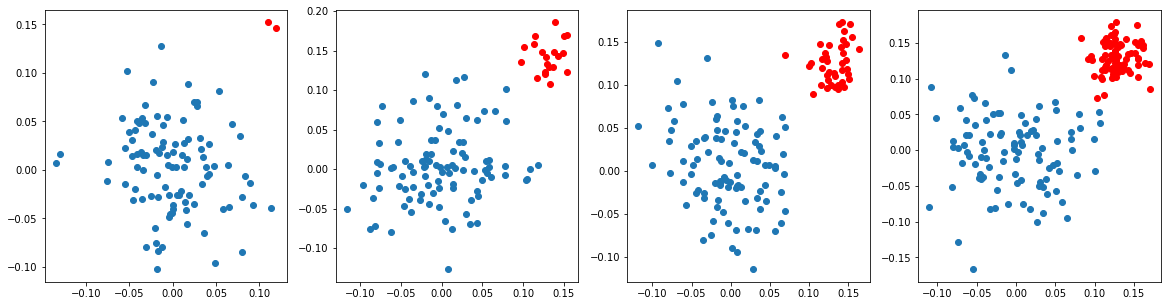

In [ ]:
plt.figure(figsize=(20,5))

for idx, data in enumerate(points):
  plt.subplot(1,4,idx+1)
  postiveidx = ratios[idx][0]-1
  negativeidx = ratios[idx][0]

  plt.scatter(data[0][:postiveidx,0], data[0][:postiveidx,1])
  plt.scatter(data[0][negativeidx:,0], data[0][negativeidx:,1], color='red')


In [ ]:
ratios = [(100,2),(100,20), (100,40),(100,80)]

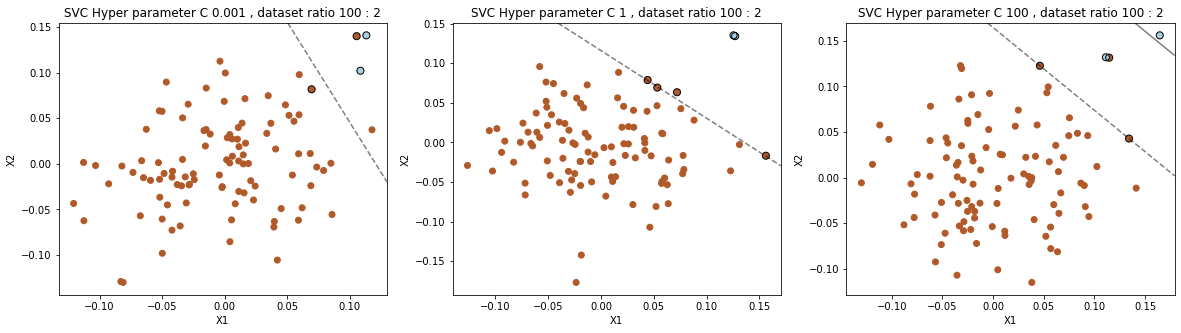

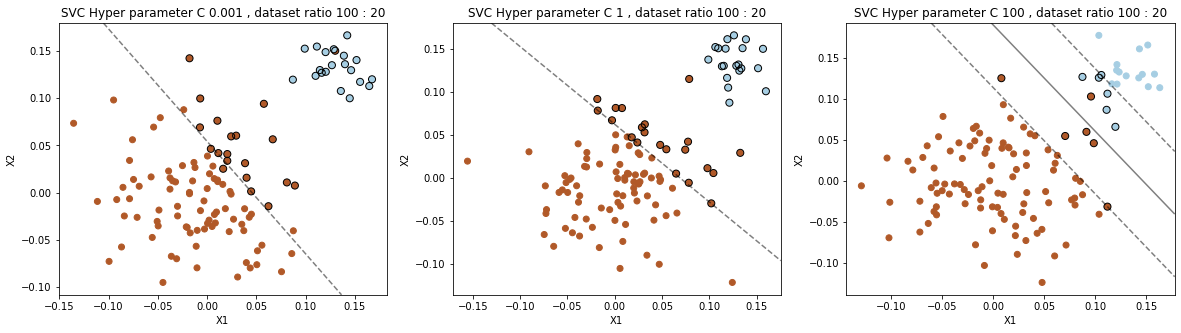

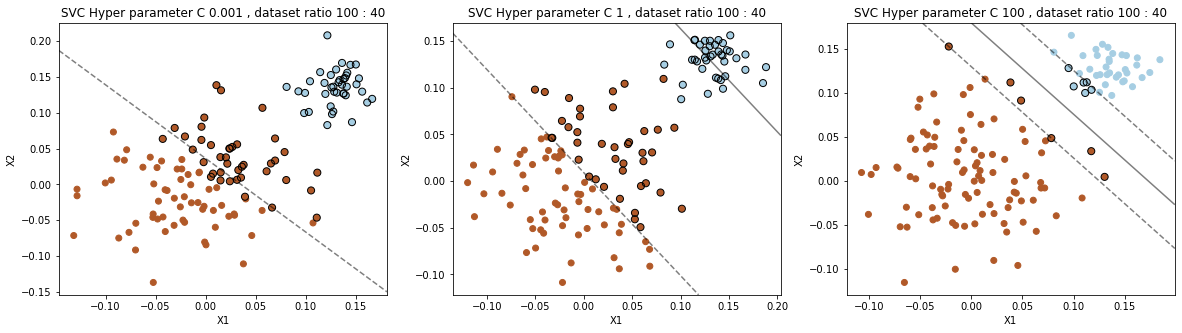

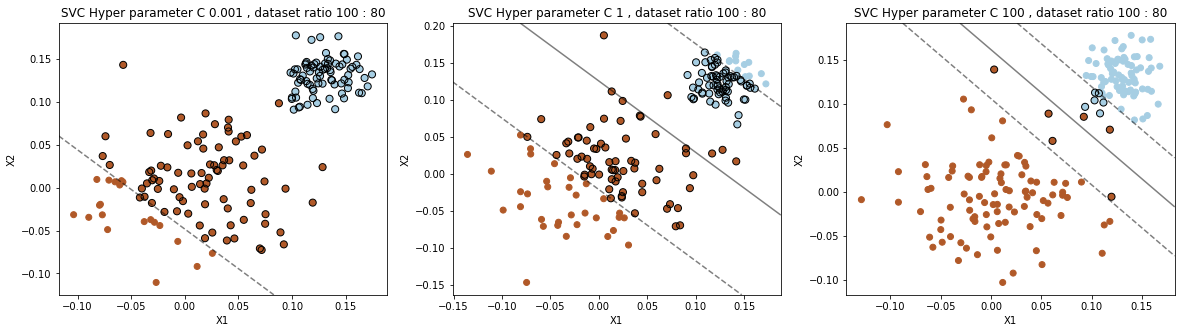

In [ ]:
C = [0.001,1,100]


for idx,ratio in enumerate(ratios):
  # generate points
  plt.figure(figsize=(20,5))
  for id,c in enumerate(C) :
    plt.subplot(1,len(C),id+1)
    xp = np.random.normal(0.0, 0.05, size=(ratio[0],2))
    xn = np.random.normal(0.13, 0.02, size=(ratio[1],2))
    # generate labels
    yp = np.array([1]*ratio[0]).reshape(-1,1)
    yn = np.array([0]*ratio[1]).reshape(-1,1)
    # build dataset
    X = np.vstack((xp,xn))
    Y = np.vstack((yp,yn))
    # run svm classfier

    svc_clf = SVC(C=c, kernel='linear')
    svc_clf.fit(X,Y)

    postiveidx = ratio[0]-1
    negativeidx = ratio[0]
    plt.title(f'SVC Hyper parameter C {c} , dataset ratio {ratio[0] } : {ratio[1]}')
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired)
    plt.xlabel('X1')
    plt.ylabel('X2')
    # plt.scatter(X[negativeidx:,0], X[negativeidx:,1], color='red',cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc_clf.decision_function(xy).reshape(XX.shape)

    # # # plot decision boundary and margins
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    
    ax.scatter(svc_clf.support_vectors_[:, 0], svc_clf.support_vectors_[:, 1], s=50,
              linewidth=1, facecolors='none', edgecolors='k')
    # plt.savefig()
  plt.show()

Observations:


Task 2: Logistic Regression

In [ ]:
def draw_line(coef,intercept, mi, ma): # FUCTION TO DRAW SEPERATING PLANE
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1]) 

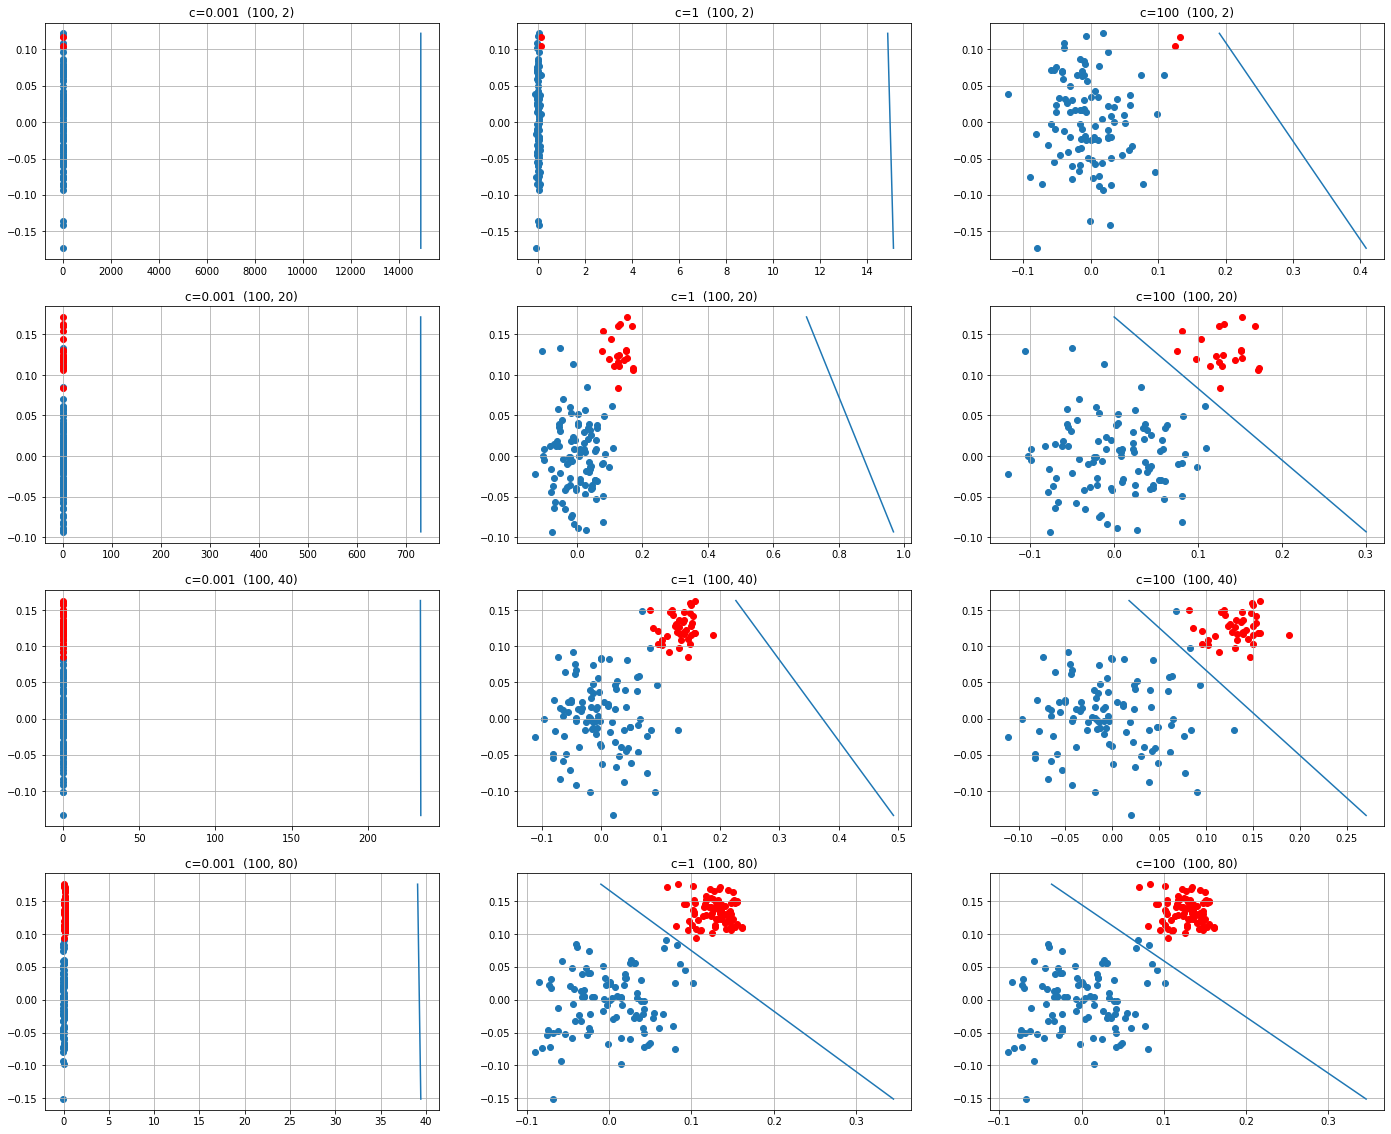

In [ ]:
np.random.seed(15)
s=0
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
rate= [0.001, 1, 100]
plt.figure(figsize=(24,20))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for k in range(3):
        s=s+1
        plt.subplot(4,3,s)
        plt.title("c="+str(rate[k])+"  "+str(i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf = LogisticRegression(C=rate[k],random_state=15)
        clf.fit(X,y)
        weight=clf.coef_
        intercept=clf.intercept_
        mi=min(X[:,1])
        mx=max(X[:,1])
        draw_line(weight[0],intercept,mi,mx)
        

Observations:


*   As the value of the regularization term increases, we see that the plane is able to seperate  the  classes better.  
*   In the case of SVM, we see that the maximum margin plane is not even visible, meaning it elsewhere where there's no seperation (underfitting here).

